In [218]:
import pandas as pd
from pandas import Grouper
import datetime as dt
from pandas import DataFrame
import numpy as np 
import seaborn as sns
data = pd.read_json (r'ultimate_challenge/ultimate_data_challenge.json')
logins = pd.read_json (r'ultimate_challenge/logins.json')

In [219]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [220]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [221]:
logins['count'] = 1

In [222]:
logins.set_index('login_time', inplace=True)

In [223]:
logins = logins.resample("15T").agg({'count':'sum'})

In [ ]:
#get hourly data cycles as well

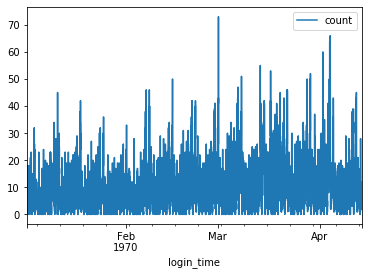

In [224]:
import matplotlib.pyplot as plt
logins.plot()
plt.show()
#from this graph it's clear to see a weekly trend of increased logins on weekdays (I'm assuming from the interval 
#spacing in the month side, those peaks are dividing nicely into the amount of weeks there are in that month. However,
#a closer up image would need to be done to see if there are daily trends as well.)

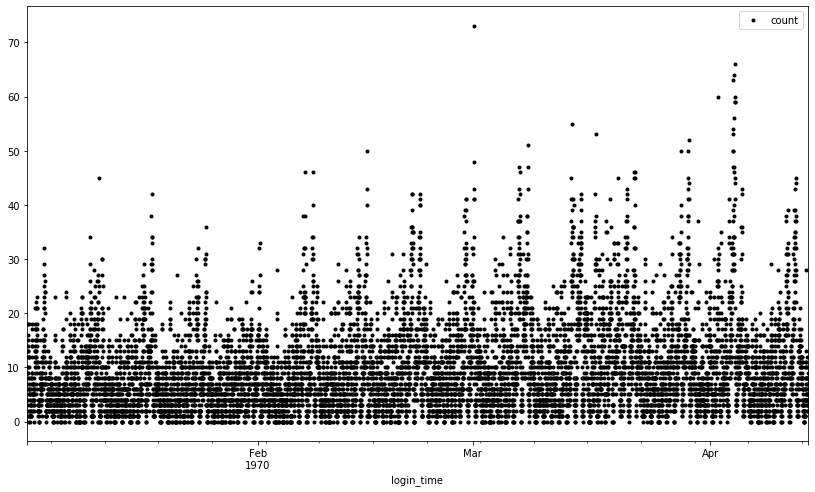

In [225]:
logins.plot(style='k.', figsize = (14, 8))
plt.show()

In [226]:
logins = logins.reset_index()
logins['weekday'] = logins['login_time'].dt.weekday
daynames = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6: 'Sunday'}
logins['weekday'] = logins['weekday'].map(daynames)

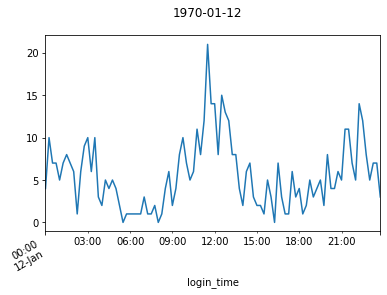

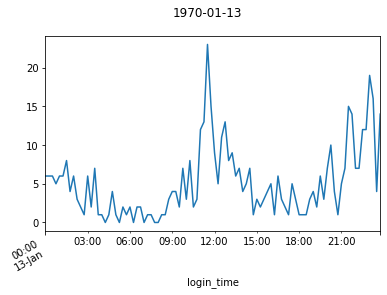

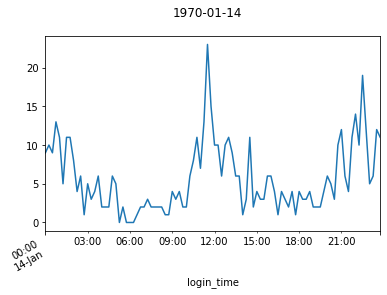

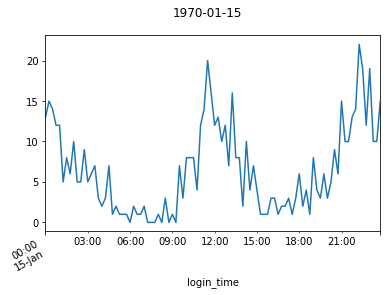

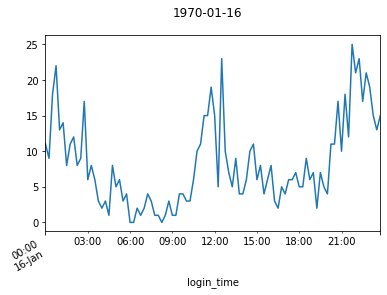

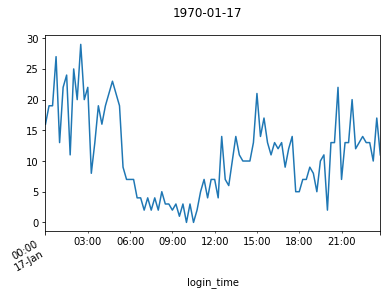

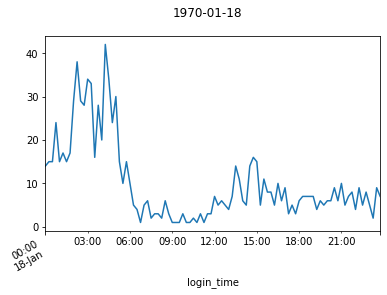

In [232]:
logins['1970-01-12'].plot(subplots=True, legend=False, title = '1970-01-12')
logins['1970-01-13'].plot(subplots=True, legend=False, title = '1970-01-13')
logins['1970-01-14'].plot(subplots=True, legend=False, title = '1970-01-14')
logins['1970-01-15'].plot(subplots=True, legend=False, title = '1970-01-15')
logins['1970-01-16'].plot(subplots=True, legend=False, title = '1970-01-16')
logins['1970-01-17'].plot(subplots=True, legend=False, title = '1970-01-17')
logins['1970-01-18'].plot(subplots=True, legend=False, title = '1970-01-18')
plt.show()
#from this it shows that there is definitely a daily pattern to this data as well. That pattern depends on day of the 
#week though judging by the last two days of the week exhibiting different patterns (aka weekend vs weekday)

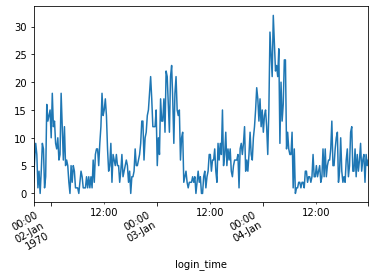

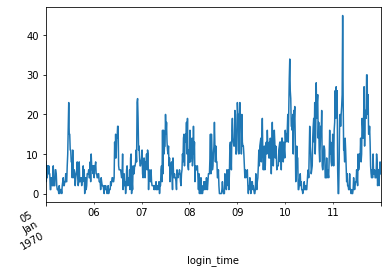

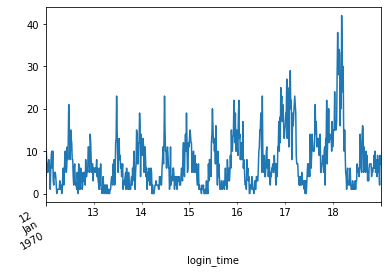

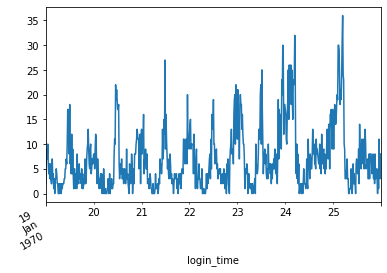

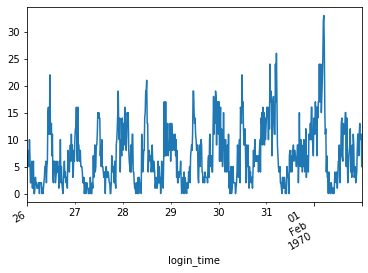

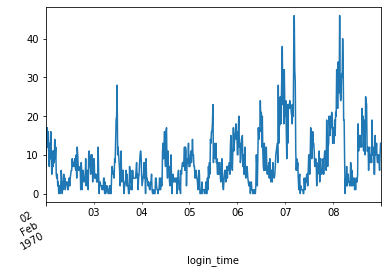

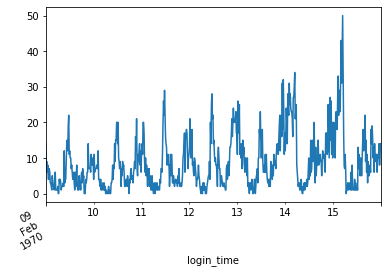

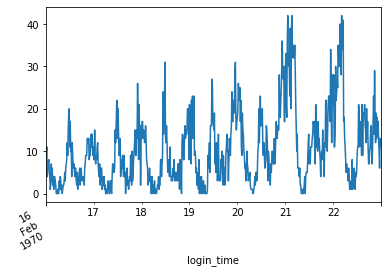

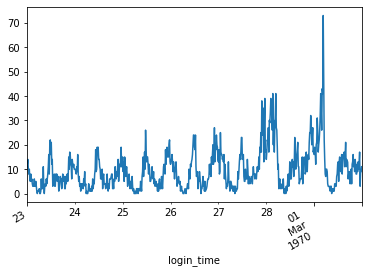

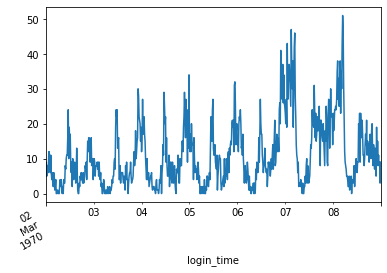

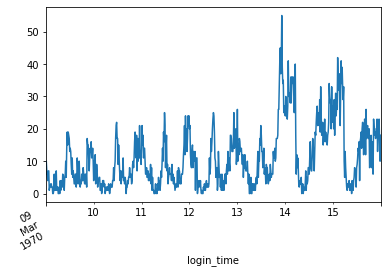

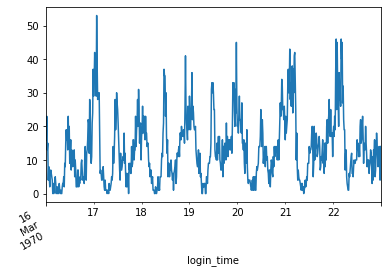

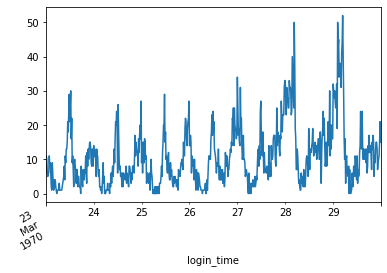

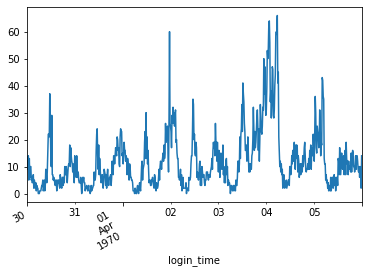

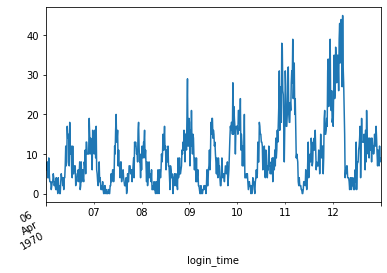

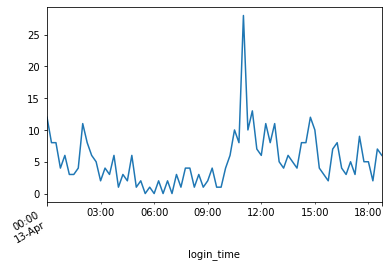

In [228]:
logins.set_index('login_time', inplace=True)
groups = logins.groupby(Grouper(freq='1W'))
#years = DataFrame()
groups.plot(subplots=True, legend=False)
plt.show()

In [233]:
logins.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [234]:
#Based off of what we are seeing here, demand clearly seems to rise and fall in daily patterns based on hours of day,
# and weekly patterns with increased demand peaks falling on weekends.

In [235]:
logins.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

the key metric I would use to measure success in this experiment is the average number of sign-in locations per day and per week by individual drivers before the toll reimbursement period, and if the sign-in locations include the other city in a noticeable way (above chance) during the period of reimbursement then it is successful.
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment-

I would implement the experiment by first collecting the data of driver app sign-ins and the locations of those sign-ins for a month prior to the reimbursement as well as the cycle after reimbursement. To determine a "multi-city" user, that number would have to be above 1 (particular city sign-in)in a 24 hour period and a weekly period. I would also be noticing daily and weekly cyclical patterns to see if averages change as well. Then I would collect the data during the reimbursement period for a month and compare those cycles and patterns with the mutliple city sign-in rate to see if those sign-ins are above chance AKA statistically significant.
those rates would be the average number of multi-city sign-ins at a.) peak daily times b.) peak weekly times

b. what statistical test(s) you will conduct to verify the significance of the
observation?

I would use ANOVA if, while performing EDA I notice that the mean number of multi-city sign ins between peak daily times and peak weekly times are drastically different, since that would mean there are multiple factors at play. If there isn't a drastic difference than I would just use a paired T-test.
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
        If the results showed that the average multi-city user numbers increased from the pre-reimbursement period in a significant way as a proportion of multi-city users to sample population above statistical significance, than I would recommend they keep the reimbursement program going, otherwise I would discontinue it. Caveats come with only using a month of data which may be different depending on Monthly holiday schedules and that they couldn't be compard exactly to each month because of that, which creates the possibility that one month- due to possibly having more or less holidays- might have higher proportion because of "special events"

In [236]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


Proccess : 1.)create a column comparing 30 days from last trip date column and call them retained if they fall greater than that date
2.) visualize retention with plot
3.) perform classification on which are and which aren't retained and choose best predictors for retention

In [237]:
data.info() #ok looks like we need to impute values into3 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [256]:
data['avg_rating_of_driver'] = data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].mean()) 
data['avg_rating_by_driver'] = data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].mean()) 


In [257]:
data.phone.value_counts()

iPhone     34582
Android    15022
0.0          396
Name: phone, dtype: int64

In [258]:
data['phone'] = data['phone'].fillna('iPhone') 

In [259]:
data.info() #better.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  retained                50000 non-null  bool  

In [260]:
data['last_trip_date'] =  pd.to_datetime(data['last_trip_date'])
data['signup_date'] =  pd.to_datetime(data['signup_date'])
startingpoint = data['last_trip_date'].max()
delta = dt.timedelta(days=30)
retentionpoint= startingpoint- delta

so it looks like the data had to have been sampled by 2014-07-01 since that is the most recent date we have. We will go ahead and use this date to create our 30 day retention point, since they want to use the user's activity of using the app in the PRECEDING 30 days from the sample. It will be interesting to compare usage in first 30 days to last 30 days.

In [261]:
#create a column to identify retained customers based on last trip date and retention point
data['retained'] = True

In [262]:
data.loc[data.last_trip_date < retentionpoint, 'retained'] = False

In [263]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


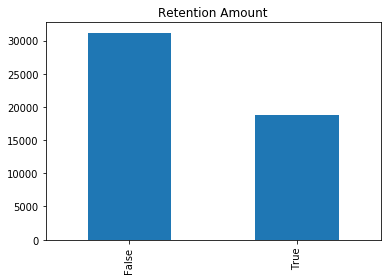

In [264]:
data['retained'].value_counts().plot(kind='bar', 
                                     title='Retention Amount')
plt.show()

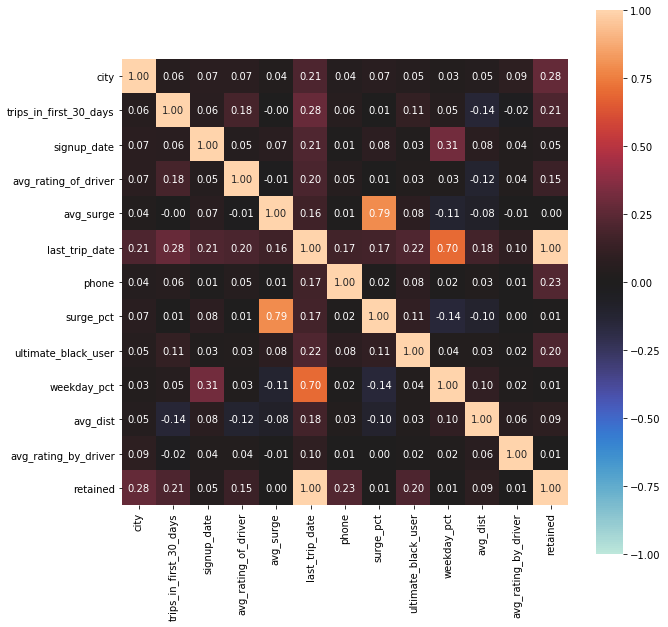

{'corr':                             city  trips_in_first_30_days  signup_date  \
 city                    1.000000                0.061160     0.071520   
 trips_in_first_30_days  0.061160                1.000000     0.062612   
 signup_date             0.071520                0.062612     1.000000   
 avg_rating_of_driver    0.073681                0.182136     0.045593   
 avg_surge               0.037414               -0.001841     0.065017   
 last_trip_date          0.206547                0.282140     0.212862   
 phone                   0.042879                0.059313     0.012397   
 surge_pct               0.065676                0.005720     0.081376   
 ultimate_black_user     0.054383                0.112210     0.028013   
 weekday_pct             0.031355                0.050388     0.313679   
 avg_dist                0.045431               -0.136329     0.076700   
 avg_rating_by_driver    0.091600               -0.016127     0.036559   
 retained                0.276

In [265]:
from dython import nominal
nominal.associations(data, nominal_columns=['city','signup_date', 'last_trip_date', 'phone', 'ultimate_black_user', 'retained'], figsize= (10,10))

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

Steps now:
1.) label encode the categorical data
2.) transform and scale- more for linear data 
3.) find a model (random forest)
4.) fit and train the model

In [267]:
data = data.drop(['signup_date','last_trip_date'],axis =1)

In [272]:
df_dum = pd.get_dummies(data.drop('retained', axis=1))

In [274]:
from sklearn.model_selection import train_test_split

X = df_dum
y = data['retained'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [275]:
#scale data
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [276]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [277]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.756
Random Forest: f1-score=0.756


In [285]:
#I'm going to try another way too just in case
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [286]:
y_pred = regressor.predict(X_test)

14


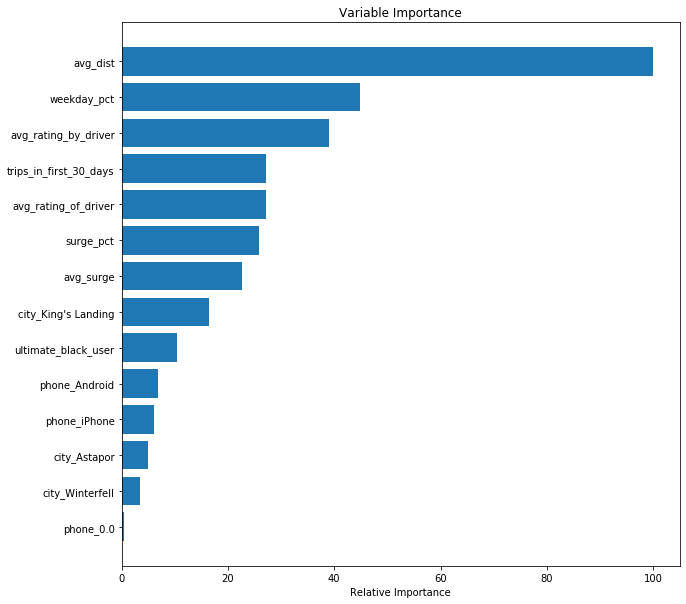

In [278]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, test_size=.2, random_state=1)
                                              

clf = LogisticRegression()
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.7203


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


So from this exercise I've learned that the most important varibale in predicting retention is actually the distance of each trip, with weekday percentage and driver rating average following. Driver rating makes complete sense, because the better experience a customer has with the driver, the more likely they are to think of this as an option in the future. Weekday percentage use and distance could also point to retention stemming from a need being fulfilled of those who don't have cars and are using Ultimate as one of their primary modes of transportation. I would recommend the company focuses on strategies to increase their driver rating since that is in their direct control as the drivers are their employees, and secondly I would recommend they start a marketing strategy targeted for those who are using Ultimate as their primary mode of transportation to increase brand awareness for a demographic that is using and retaining their product longest.